<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Modelo_Trafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargando el archivo CSV nuevamente y realizando un análisis exploratorio inicial
import pandas as pd

file_path = ('https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/Traffic.csv')
traffic_data = pd.read_csv(file_path)

# Vamos a visualizar las primeras filas del conjunto de datos para entender su estructura
traffic_data.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 a.m.,10,Tuesday,31,0,4,4,39,low
1,12:15:00 a.m.,10,Tuesday,49,0,3,3,55,low
2,12:30:00 a.m.,10,Tuesday,46,0,3,6,55,low
3,12:45:00 a.m.,10,Tuesday,51,0,2,5,58,low
4,1:00:00 a.m.,10,Tuesday,57,6,15,16,94,normal


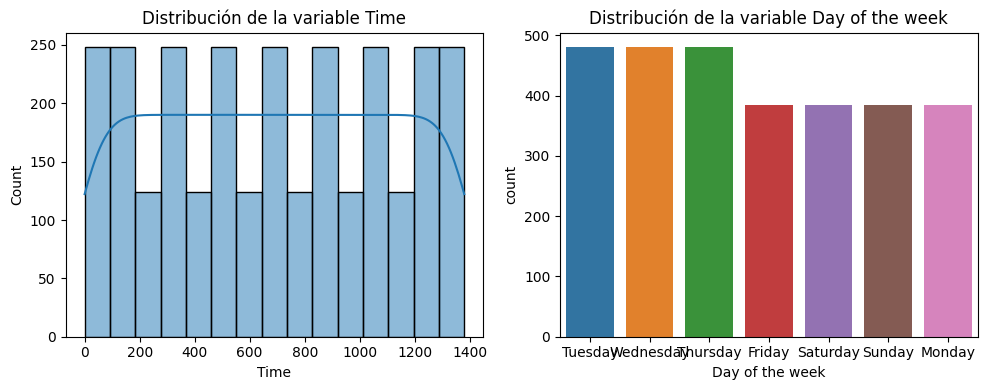

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de las variables previo al preprocesamiento
plt.figure(figsize=(10, 4))

# Histograma de la variable 'Time'
plt.subplot(1, 2, 1)
sns.histplot(traffic_data['Time'], kde=True)
plt.title('Distribución de la variable Time')

# Gráfico de barras de la variable 'Day of the week'
plt.subplot(1, 2, 2)
sns.countplot(x='Day of the week', data=traffic_data)
plt.title('Distribución de la variable Day of the week')

plt.tight_layout()
plt.show()

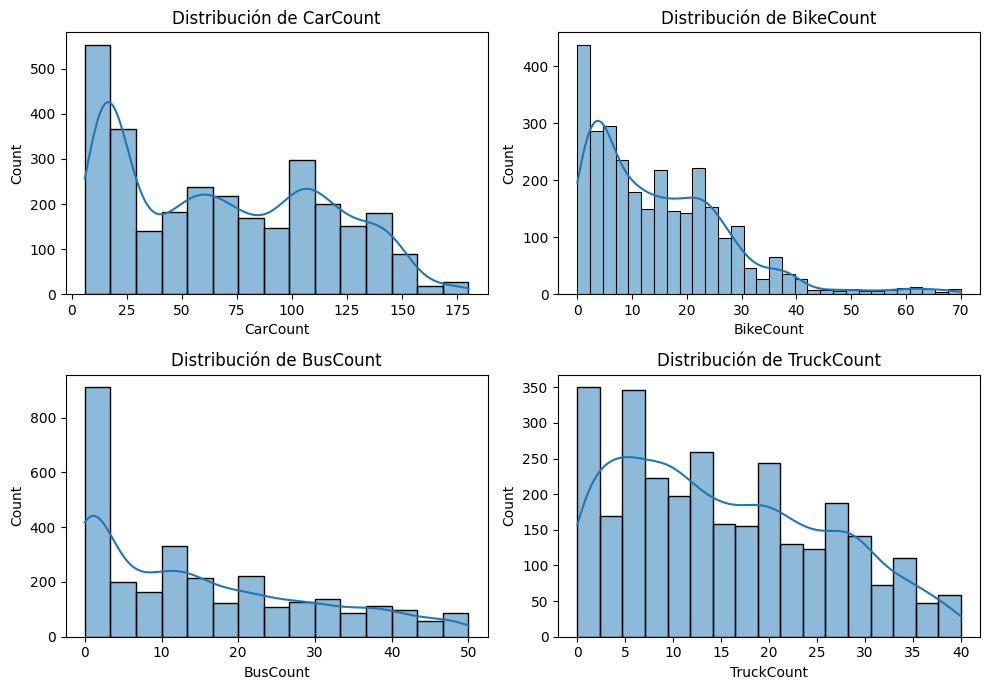

In [ ]:
# Visualización de las variables 'CarCount', 'BikeCount', 'BusCount', 'TruckCount'
plt.figure(figsize=(10, 7))

# Histograma de 'CarCount'
plt.subplot(2, 2, 1)
sns.histplot(traffic_data['CarCount'], kde=True)
plt.title('Distribución de CarCount')

# Histograma de 'BikeCount'
plt.subplot(2, 2, 2)
sns.histplot(traffic_data['BikeCount'], kde=True)
plt.title('Distribución de BikeCount')

# Histograma de 'BusCount'
plt.subplot(2, 2, 3)
sns.histplot(traffic_data['BusCount'], kde=True)
plt.title('Distribución de BusCount')

# Histograma de 'TruckCount'
plt.subplot(2, 2, 4)
sns.histplot(traffic_data['TruckCount'], kde=True)
plt.title('Distribución de TruckCount')

plt.tight_layout()
plt.show()

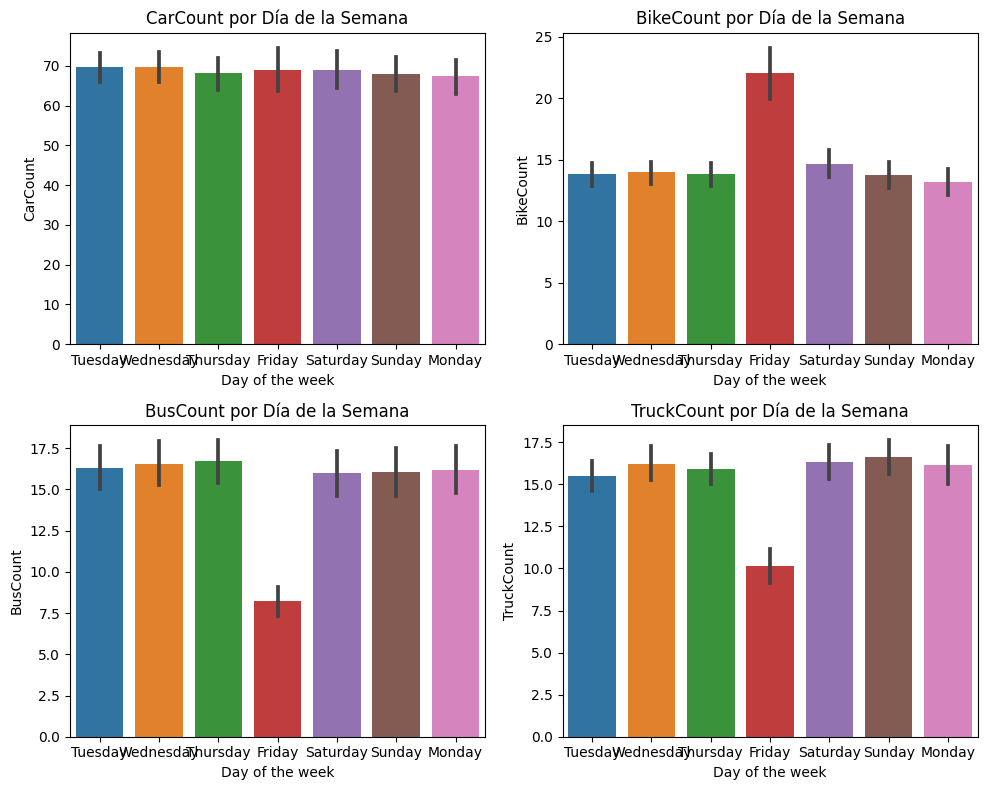

In [ ]:
# Visualización de CarCount, BikeCount, BusCount, y TruckCount por día de la semana
plt.figure(figsize=(10, 8))

# CarCount por día de la semana
plt.subplot(2, 2, 1)
sns.barplot(x='Day of the week', y='CarCount', data=traffic_data)
plt.title('CarCount por Día de la Semana')

# BikeCount por día de la semana
plt.subplot(2, 2, 2)
sns.barplot(x='Day of the week', y='BikeCount', data=traffic_data)
plt.title('BikeCount por Día de la Semana')

# BusCount por día de la semana
plt.subplot(2, 2, 3)
sns.barplot(x='Day of the week', y='BusCount', data=traffic_data)
plt.title('BusCount por Día de la Semana')

# TruckCount por día de la semana
plt.subplot(2, 2, 4)
sns.barplot(x='Day of the week', y='TruckCount', data=traffic_data)
plt.title('TruckCount por Día de la Semana')

plt.tight_layout()
plt.show()

## Primer modelo que rendimiento pobre con LinearRegression

R²: 0.030269900500853875
Mean Absolute Error: 39.22967873857522
Mean Squared Error: 2029.9815919973043
Root Mean Squared Error: 45.055317022492524
Mean Absolute Percentage Error: 1.3122592441380398
Entre el día de la semana (en inglés): Monday
Ingrese la hora (0-23): 14
Conteo de autos predicho: 69.6107400886466, Condición de Tráfico: Moderado


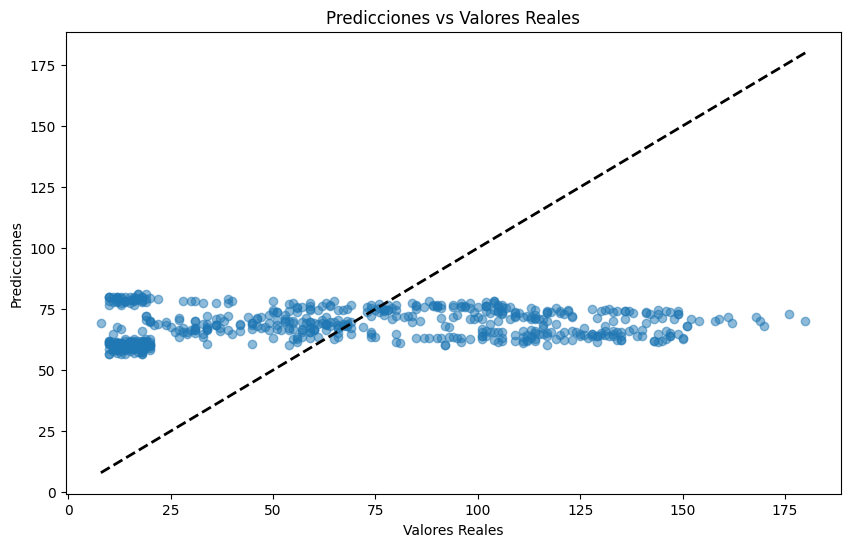

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Suponiendo que 'traffic_data' es tu DataFrame
file_path = ('https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/Traffic.csv')
traffic_data = pd.read_csv(file_path)

# Preprocesamiento de los datos
# Convertir 'Time' a minutos desde la medianoche
traffic_data['Time'] = pd.to_datetime(traffic_data['Time']).dt.hour * 60

# Codificar 'Day of the week' usando One-Hot Encoding
#categorical_features = ['Day of the week']
#one_hot = OneHotEncoder()
#transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

categorical_features = ['Day of the week']
numeric_features = ['Time']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder="passthrough")

# Seleccionar características y etiquetas para el modelo de CarCount
X = traffic_data.drop(['CarCount', 'Date', 'Total', 'Traffic Situation', 'BikeCount', 'BusCount', 'TruckCount'], axis=1)
y = traffic_data['CarCount']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creación y entrenamiento del modelo de regresión
model = Pipeline(steps=[('preprocessor', transformer),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)

# Definir los umbrales para las categorías de tráfico
low_threshold = 50
high_threshold = 100

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de rendimiento
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Imprimir las métricas
print(f'R²: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')

# Función para hacer predicciones y clasificar el tráfico
def predict_and_classify_traffic(day_of_week, hour):
    # Convertir la hora a minutos desde la medianoche
    time_in_minutes = int(hour) * 60

    # Crear un DataFrame para la predicción
    data = pd.DataFrame({'Day of the week': [day_of_week], 'Time': [time_in_minutes]})

    # Realizar la predicción
    predicted_count = model.predict(data)[0]

    # Clasificar el tráfico
    if predicted_count < low_threshold:
        traffic_category = "Bajo"
    elif predicted_count < high_threshold:
        traffic_category = "Moderado"
    else:
        traffic_category = "Alto"

    return predicted_count, traffic_category

# Ejemplo de uso
day_of_week = input("Entre el día de la semana (en inglés): ")
hour = input("Ingrese la hora (0-23): ")
predicted_count, traffic_category = predict_and_classify_traffic(day_of_week, hour)
print(f"Conteo de autos predicho: {predicted_count}, Condición de Tráfico: {traffic_category}")


# Creando un gráfico de dispersión de las predicciones vs valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de perfecta predicción
plt.show()

## Segundo Modelo con Rendimiento Mejorado con RandomForestRegressor

R²: 0.783893135195594
Mean Absolute Error: 14.745151842546374
Mean Squared Error: 452.38665653852945
Root Mean Squared Error: 21.26938307846585
Mean Absolute Percentage Error: 0.33218425734527707
Ingrese el día de la semana: Monday
Ingrese la hora (0-23): 14
Conteo de autos predicho: 65.62852623879239, Categoría de tráfico: Moderado


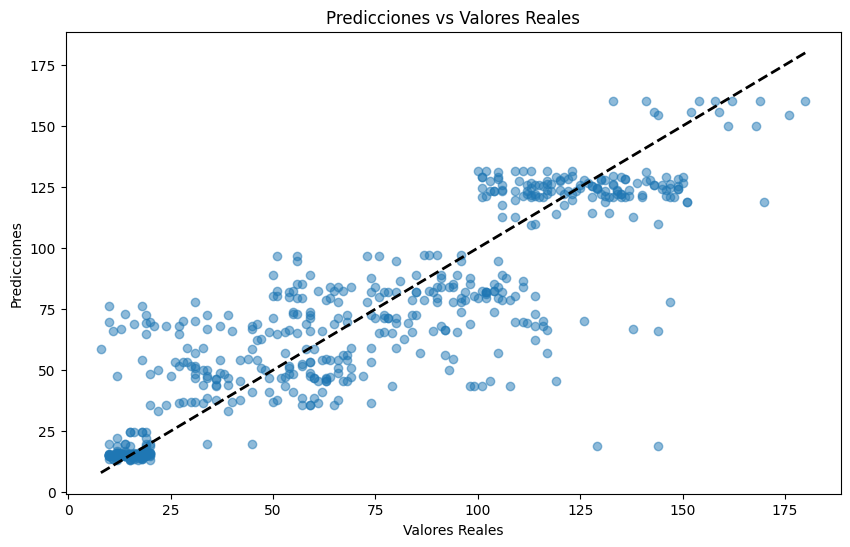

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Cargar y preparar tus datos
file_path = 'https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/Traffic.csv'
traffic_data = pd.read_csv(file_path)

# Preprocesamiento de los datos
# Convertir 'Time' a minutos desde la medianoche
traffic_data['Time'] = pd.to_datetime(traffic_data['Time']).dt.hour * 60

# Configuración del preprocesador
categorical_features = ['Day of the week']
numeric_features = ['Time']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder="passthrough")

# Seleccionar características y etiquetas para el modelo de CarCount
X = traffic_data.drop(['CarCount', 'Date', 'Total', 'Traffic Situation', 'BikeCount', 'BusCount', 'TruckCount'], axis=1)
y = traffic_data['CarCount']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creación y entrenamiento del modelo de bosque aleatorio
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))])

rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular las métricas de rendimiento
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Imprimir las métricas
print(f'R²: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')

# Función para hacer predicciones y clasificar el tráfico
def predict_and_classify_traffic(model, day_of_week, hour, low_threshold=50, high_threshold=100):
    # Convertir la hora a minutos desde la medianoche
    time_in_minutes = int(hour) * 60

    # Crear un DataFrame para la predicción
    data = pd.DataFrame({'Day of the week': [day_of_week], 'Time': [time_in_minutes]})

    # Realizar la predicción
    predicted_count = model.predict(data)[0]

    # Clasificar el tráfico
    if predicted_count < low_threshold:
        traffic_category = "Bajo"
    elif predicted_count < high_threshold:
        traffic_category = "Moderado"
    else:
        traffic_category = "Alto"

    return predicted_count, traffic_category

# Ejemplo de uso
# Puedes descomentar y ejecutar las siguientes líneas para probar la función
day_of_week = input("Ingrese el día de la semana: ")
hour = input("Ingrese la hora (0-23): ")
predicted_count, traffic_category = predict_and_classify_traffic(rf_model, day_of_week, hour)
print(f"Conteo de autos predicho: {predicted_count}, Categoría de tráfico: {traffic_category}")

# Creando un gráfico de dispersión de las predicciones vs valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de perfecta predicción
plt.show()


## Busqueda de mejores optimizadores

### Mejores parámetros encontrados:
 {'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Cargar y preparar tus datos
file_path = 'https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/Traffic.csv'
traffic_data = pd.read_csv(file_path)

# Preprocesamiento de los datos
# Convertir 'Time' a minutos desde la medianoche
traffic_data['Time'] = pd.to_datetime(traffic_data['Time']).dt.hour * 60

# Configuración del preprocesador
categorical_features = ['Day of the week']
numeric_features = ['Time']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Seleccionar características y etiquetas para el modelo de CarCount
X = traffic_data.drop(['CarCount', 'Date', 'Total', 'Traffic Situation', 'BikeCount', 'BusCount', 'TruckCount'], axis=1)
y = traffic_data['CarCount']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir el modelo de bosque aleatorio y el preprocesador en un pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(random_state=0))])

# Definir la cuadrícula de parámetros para la búsqueda
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mejores parámetros
print('Mejores parámetros encontrados:\n', grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores parámetros encontrados:
 {'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}


## ENTRENAMIENTO CON OPTIMIZADORES NUEVOS

In [ ]:
# Reentrenar el modelo con los mejores parámetros encontrados
optimized_rf = RandomForestRegressor(
    max_depth=10,
    max_features='auto',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=0
)

# Crear un nuevo pipeline con el modelo optimizado
optimized_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', optimized_rf)])

# Entrenar el modelo optimizado
optimized_pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_optimized = optimized_pipeline.predict(X_test)

# Calcular las métricas de rendimiento
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
mape_optimized = mean_absolute_percentage_error(y_test, y_pred_optimized)

# Imprimir las métricas optimizadas
print(f'R² Optimizado: {r2_optimized}')
print(f'Mean Absolute Error Optimizado: {mae_optimized}')
print(f'Mean Squared Error Optimizado: {mse_optimized}')
print(f'Root Mean Squared Error Optimizado: {rmse_optimized}')
print(f'Mean Absolute Percentage Error Optimizado: {mape_optimized}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R² Optimizado: 0.791991431602312
Mean Absolute Error Optimizado: 14.51390178033957
Mean Squared Error Optimizado: 435.43411207211943
Root Mean Squared Error Optimizado: 20.867058059825286
Mean Absolute Percentage Error Optimizado: 0.32921730123691484


## COMPARACIÓN CON OTROS ALGORITMOS DE REGRESION

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

# Crear y entrenar los modelos
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
lr_model.fit(X_train, y_train)

ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', Ridge())])
ridge_model.fit(X_train, y_train)

lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', Lasso())])
lasso_model.fit(X_train, y_train)

elasticnet_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', ElasticNet())])
elasticnet_model.fit(X_train, y_train)

svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', SVR())])
svr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Day of the week'])])),
                ('regressor', SVR())])

In [ ]:
# Evaluar los modelos y calcular las métricas
models = {'Linear Regression': lr_model, 'Ridge': ridge_model,
          'Lasso': lasso_model, 'ElasticNet': elasticnet_model,
          'SVR': svr_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'{name} Metrics:')
    print(f'  R²: {r2}')
    print(f'  Mean Absolute Error: {mae}')
    print(f'  Mean Squared Error: {mse}')
    print(f'  Root Mean Squared Error: {rmse}')
    print(f'  Mean Absolute Percentage Error: {mape}\n')

Linear Regression Metrics:
  R²: 0.030279266269120253
  Mean Absolute Error: 39.22969139841577
  Mean Squared Error: 2029.9619861944263
  Root Mean Squared Error: 45.055099447170534
  Mean Absolute Percentage Error: 1.3122512286019057

Ridge Metrics:
  R²: 0.030285640571247607
  Mean Absolute Error: 39.229872464323925
  Mean Squared Error: 2029.948642568208
  Root Mean Squared Error: 45.054951365729025
  Mean Absolute Percentage Error: 1.312270259347352

Lasso Metrics:
  R²: 0.030737938600595927
  Mean Absolute Error: 39.33884477014818
  Mean Squared Error: 2029.0018258465782
  Root Mean Squared Error: 45.044442785393386
  Mean Absolute Percentage Error: 1.3208057891182812

ElasticNet Metrics:
  R²: 0.024938330597990443
  Mean Absolute Error: 39.57968501510398
  Mean Squared Error: 2041.142417844465
  Root Mean Squared Error: 45.17900417057093
  Mean Absolute Percentage Error: 1.336523534124863

SVR Metrics:
  R²: 0.2805594324801419
  Mean Absolute Error: 31.800207519740937
  Mean Squa

## SCRIPT PARA LOS DATOS AGRUPADOS POR HORAS Y DIAS DE LA SEMANA

In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/Traffic-3.csv'
traffic_data = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos para entender su estructura
traffic_data.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0:00,10,Tuesday,31,0,4,4,39,low
1,0:15,10,Tuesday,49,0,3,3,55,low
2,0:30,10,Tuesday,46,0,3,6,55,low
3,0:45,10,Tuesday,51,0,2,5,58,low
4,1:00,10,Tuesday,57,6,15,16,94,normal


In [ ]:
# Extrayendo la hora del día en formato numérico (0-23) de la columna de tiempo
traffic_data['Hour'] = pd.to_datetime(traffic_data['Time'], format='%H:%M').dt.hour

# Agrupando los datos por 'Hour' y 'Day of the week', y sumando 'CarCount'
grouped_data = traffic_data.groupby(['Hour', 'Day of the week'])['CarCount'].sum().reset_index()

# Guardar los datos agrupado en un archivo csv
grouped_data.to_csv('Grouped_Traffic_Data.csv', index=False)

# Mostrar las primeras filas del conjunto de datos agrupado
grouped_data.head()

,Hour,Day of the week,CarCount
0,0,Friday,238
1,0,Monday,231
2,0,Saturday,235
3,0,Sunday,245
4,0,Thursday,296
